Dependencies

In [2]:
import tensorflow as tf
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

Removing dodgy images

In [4]:
import cv2
import imghdr

C:\Users\Bruce\AppData\Local\Temp\ipykernel_17084\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Load Data

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
import os

def check_file_names(directory):
    for root, dirs, files in os.walk(directory):
        for name in files + dirs:
            try:
                name.encode('utf-8')
            except UnicodeEncodeError:
                print(f"Non-UTF-8 file or directory name: {os.path.join(root, name)}")

check_file_names('data')

In [10]:
import cv2
import matplotlib.pyplot as plt

def show_image(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.axis("off")
        plt.title(image_path)
        plt.show()
    else:
        print(f"❌ Unable to read: {image_path}")

data_dir = "data"

for root, _, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        img = cv2.imread(file_path)
        if img is None:  # Image is unreadable
            print(f"❌ Corrupted image: {file_path}")
            show_image(file_path)  # Show the image


In [11]:
import tensorflow as tf

def safe_image_dataset_from_directory(directory):
    try:
        return tf.keras.utils.image_dataset_from_directory(directory)
    except UnicodeDecodeError as e:
        print(f"Skipping problematic file: {e}")
        return None

data = safe_image_dataset_from_directory('data')

Found 706 files belonging to 2 classes.


In [12]:
import os

data_dir = "data"  # Change this if your path is different

for root, dirs, files in os.walk(data_dir):
    for file in files:
        try:
            file.encode('utf-8')  # Try encoding to UTF-8
        except UnicodeEncodeError:
            print(f"Problematic file: {os.path.join(root, file)}")


In [13]:
import os

data_dir = "data"  # Change this if your path is different

for root, dirs, files in os.walk(data_dir):
    for file in files:
        try:
            file.encode('utf-8')  # Try encoding to UTF-8
        except UnicodeEncodeError:
            print(f"🚨 Problematic file: {os.path.join(root, file)}")


In [130]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 706 files belonging to 2 classes.


In [131]:
data_iterator = data.as_numpy_iterator()

In [136]:
batch = data_iterator.next()

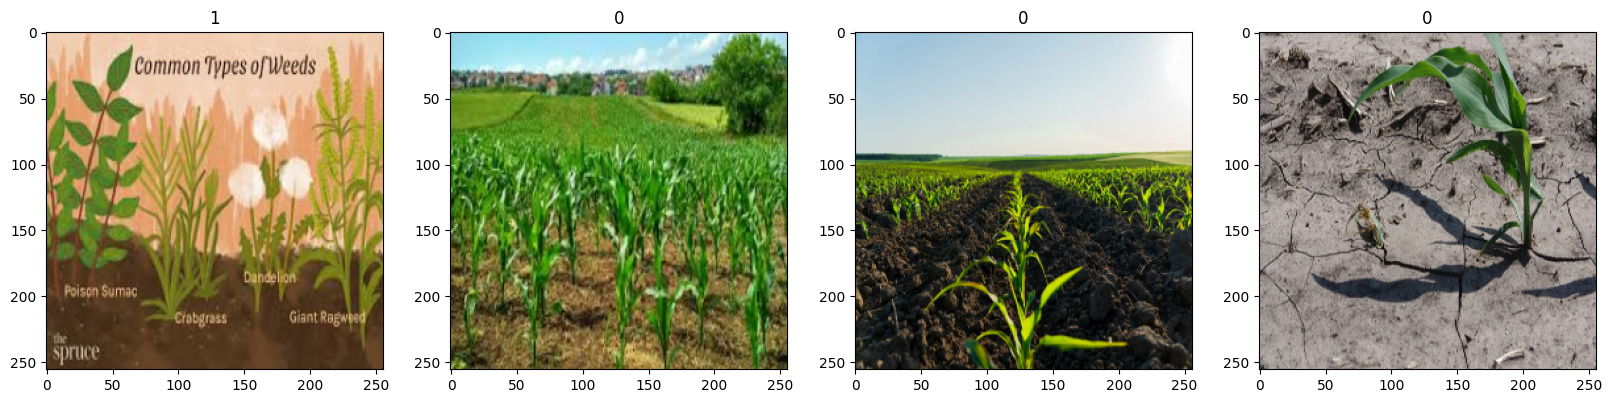

In [137]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Data Preprocessing

Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[5.3802848e-01, 6.1780792e-01, 1.5648361e-01],
          [4.6287721e-01, 5.7676929e-01, 8.2274430e-02],
          [4.7393727e-01, 6.1832494e-01, 6.3059129e-02],
          ...,
          [2.6578394e-01, 3.7677696e-01, 2.1841490e-01],
          [2.4334788e-01, 3.5428920e-01, 1.9027458e-01],
          [1.9897556e-01, 3.1060624e-01, 1.4651310e-01]],
 
         [[6.0734528e-01, 6.8712467e-01, 2.2958793e-01],
          [5.4648435e-01, 6.4720052e-01, 1.7258732e-01],
          [4.8699641e-01, 6.2265819e-01, 9.4374232e-02],
          ...,
          [2.3014706e-01, 3.5503599e-01, 1.7417854e-01],
          [2.2009803e-01, 3.4382084e-01, 1.6136451e-01],
          [1.7190181e-01, 2.9812729e-01, 1.0794845e-01]],
 
         [[6.4938724e-01, 7.2389704e-01, 2.7006549e-01],
          [5.9791666e-01, 6.9290364e-01, 2.3649472e-01],
          [5.0765932e-01, 6.2622356e-01, 1.4595588e-01],
          ...,
          [1.8954313e-01, 3.3782744e-01, 1.2912646e-01],
          [1.7257391e-01, 3.2085824e-

Split Data

In [20]:
len(data)

23

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build Deep Learning Model

In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
import os

data_dir = "data/weeds"  # Update this if needed

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        print(f"Class '{class_name}' has {len(os.listdir(class_path))} images")


In [27]:
images, labels = next(iter(train))
print(f"Image batch shape: {images.shape}")


Image batch shape: (32, 256, 256, 3)


In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Bruce\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
for images, labels in train.take(1):  # Take one batch to inspect
    print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")


Batch shape: (32, 256, 256, 3), Labels shape: (32,)


In [34]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 960ms/step - accuracy: 0.6148 - loss: 0.6625 - val_accuracy: 0.7500 - val_loss: 0.4986
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 793ms/step - accuracy: 0.7553 - loss: 0.5405 - val_accuracy: 0.8359 - val_loss: 0.4094
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 930ms/step - accuracy: 0.7559 - loss: 0.4875 - val_accuracy: 0.8125 - val_loss: 0.3880
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8513 - loss: 0.3587 - val_accuracy: 0.7734 - val_loss: 0.4480
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 836ms/step - accuracy: 0.8996 - loss: 0.2753 - val_accuracy: 0.8359 - val_loss: 0.3661
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 814ms/step - accuracy: 0.8888 - loss: 0.2810 - val_accuracy: 0.9062 - val_loss: 0.2099
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 822ms/step - accuracy: 0.9300 - loss: 0.1979 - val_accuracy: 0.9141 - val_loss: 0.2388
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 827ms/step - accuracy: 0.9736 - loss: 0.1633 - val_accurac

Plot Perfomance

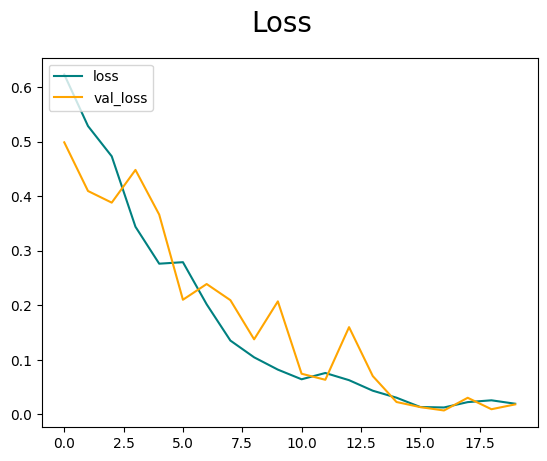

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

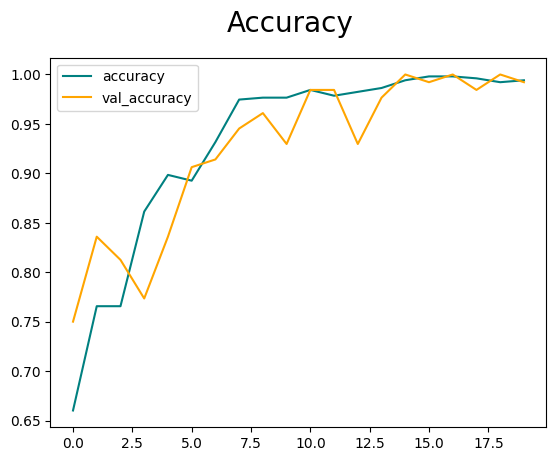

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


In [40]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9444444, shape=(), dtype=float32) tf.Tensor(0.9848485, shape=(), dtype=float32)


Test


In [93]:
import cv2

In [163]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = 'maize6.jpg'
img = cv2.imread(image_path)

# Check if image is loaded
if img is None:
    print("❌ Error: Image not found or couldn't be loaded.")
    print("🔍 Current working directory:", os.getcwd())
    print("📂 Available files in directory:", os.listdir())
else:
    print("✅ Image loaded successfully! Shape:", img.shape)


✅ Image loaded successfully! Shape: (546, 1600, 3)


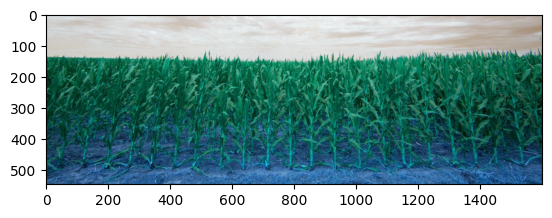

In [164]:
img = cv2.imread('maize6.jpg')
plt.imshow(img)
plt.show()

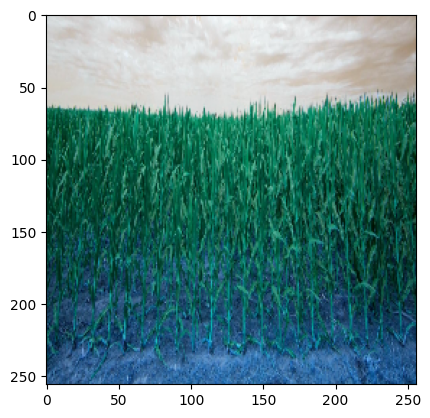

In [165]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [166]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


In [167]:
yhat

array([[0.26272]], dtype=float32)

In [168]:
if yhat > 0.5:
    print(f'Predicted class is weed')
else:
    print(f'Predicted class is maize')

Predicted class is maize


Saving model

In [149]:
from tensorflow.keras.models import load_model

In [49]:
model.save(os.path.join('models', 'maize-weedClassifier.h5'))

In [53]:
new_model = load_model(os.path.join('models', 'maize-weedClassifier.h5'))